# Question 2

Build One-to-Many RNN full gradient from scratch

## Task
- `Many-to-Many`를 직접 구현할 수 있다
- `One-to-Many`를 직접 구현할 수 있다

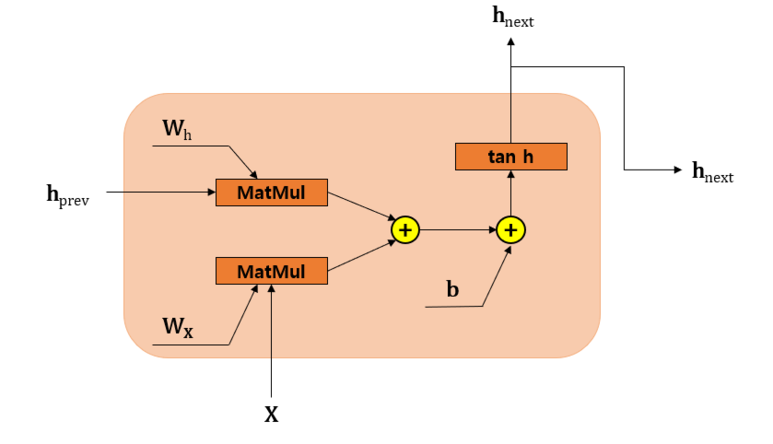

# (참고) Many-to-Many using Keras TimeDistributed layer

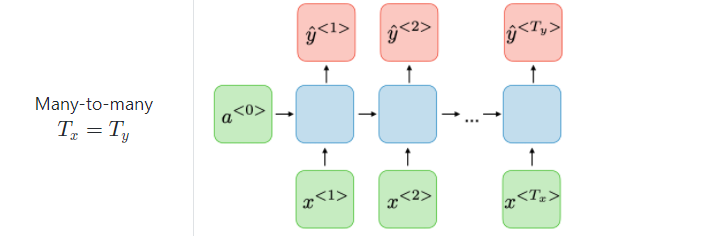

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
idx2char = [_ for _ in 'KERAS']
num_classes = len(idx2char)
print(num_classes)
idx2char

5


['K', 'E', 'R', 'A', 'S']

In [6]:
#### Teach: machin -> achine
x_data = [[0,1,2,3]] # KERA
y_data = [[1,2,3,4]]  # ERAS

In [5]:
x_one_hot = tf.keras.utils.to_categorical(x_data, num_classes=num_classes)
x_one_hot

array([[[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.]]], dtype=float32)

In [7]:
y_one_hot = tf.keras.utils.to_categorical(y_data, num_classes=num_classes)
y_one_hot

array([[[0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]], dtype=float32)

In [9]:
input_dim = 5 # one-hot size
hidden_size = 20 # output from the RNN.
batch_size = 1 # one word
sequence_length = 4 # |ERAS| == 4
learning_rate = 0.1

In [10]:
print(x_one_hot.shape)
print(y_one_hot.shape)

(1, 4, 5)
(1, 4, 5)


In [11]:
# many-to-many using TimeDistributed layer

RNN_M_t_M = tf.keras.Sequential()

# make cell and add it to RNN layer
# input_shape = (1,6,6) => number of sequence (batch), length of sequence, size of input dim
cell = tf.keras.layers.SimpleRNNCell(units=num_classes, input_shape=(sequence_length, input_dim))

RNN_M_t_M.add(tf.keras.layers.RNN(cell=cell, return_sequences=True))
RNN_M_t_M.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=num_classes, activation='softmax')))
RNN_M_t_M.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

In [12]:
# train
RNN_M_t_M.fit(x_one_hot, y_one_hot, epochs=100, verbose = 1)
RNN_M_t_M.summary()

Epoch 1/100
1/1 [==============================] - 1s 614ms/step - loss: 2.1469 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 1.4806 - accuracy: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 1.1205 - accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 0.8663 - accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.5331 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2461 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1823 - accuracy: 1.0000
Epoch 11/100
1/1 [=====

In [13]:
np.squeeze(x_one_hot).shape

(4, 5)

In [14]:
input_x = [idx2char[c] for c in np.argmax(np.squeeze(x_one_hot), axis =1)]
input_x

['K', 'E', 'R', 'A']

In [15]:
predictions = RNN_M_t_M.predict(x_one_hot)
pred = [idx2char[c] for c in np.argmax(np.squeeze(predictions), axis =1)]
pred

['E', 'R', 'A', 'S']

In [16]:
for i, prediction in enumerate(predictions):

    print(prediction)

    # print char using argmax, dict

    result_str = [idx2char[c] for c in np.argmax(prediction, axis=1)]
    
    print("\nInput X str: ", ''.join(input_x))
    print("Final Prediction str: ", ''.join(result_str))

[[4.83803669e-05 9.99256551e-01 2.43813280e-04 6.54654002e-08
  4.51052474e-04]
 [9.66323023e-06 5.36945183e-04 9.98789966e-01 5.82302629e-04
  8.10953279e-05]
 [2.03842537e-05 1.08362201e-07 7.13700894e-04 9.99143958e-01
  1.21834048e-04]
 [5.82388311e-05 5.20079164e-04 1.10978735e-05 1.43514262e-04
  9.99267042e-01]]

Input X str:  KERA
Final Prediction str:  ERAS


---

# One-to-Many
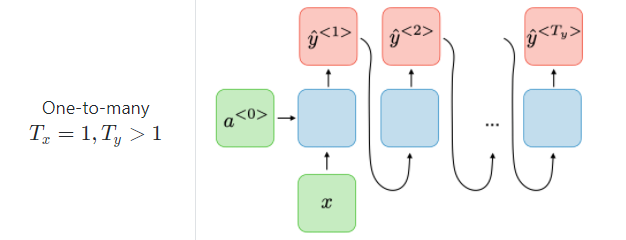

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
idx2char = [_ for _ in 'KERAS']
num_classes = len(idx2char)
print(num_classes)
idx2char

5


['K', 'E', 'R', 'A', 'S']

In [19]:
#### Teach: machin -> achine
x_data = [[0]] # KERA
y_data = [[1,2,3,4]]  # ERAS

In [20]:
x_one_hot = tf.keras.utils.to_categorical(x_data, num_classes=num_classes)
x_one_hot

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [21]:
y_one_hot = tf.keras.utils.to_categorical(y_data, num_classes=num_classes)
y_one_hot

array([[[0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]], dtype=float32)

In [22]:
input_dim = 5 # one-hot size
hidden_size = 20 # output from the RNN.
batch_size = 1 # one word
sequence_length = 4 # |ERAS| == 4
learning_rate = 0.1

In [23]:
number_of_times = 4

In [24]:
# https://stackoverflow.com/questions/43034960/many-to-one-and-many-to-many-lstm-examples-in-keras

RNN_O_t_M = tf.keras.Sequential()

# make cell and add it to RNN layer
# input_shape = (1,6,6) => number of sequence (batch), length of sequence, size of input dim
cell = tf.keras.layers.SimpleRNNCell(units=num_classes, input_shape=(sequence_length, input_dim))

RNN_O_t_M.add(layers.RepeatVector(number_of_times))
RNN_O_t_M.add(tf.keras.layers.RNN(cell=cell, return_sequences=True))
RNN_O_t_M.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=num_classes, activation='softmax')))
RNN_O_t_M.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

In [25]:
# train
RNN_O_t_M.fit(x_one_hot, y_one_hot, epochs=100, verbose = 1)
RNN_O_t_M.summary()

Epoch 1/100
1/1 [==============================] - 1s 542ms/step - loss: 1.7270 - accuracy: 0.2500
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 1.3963 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 1.2997 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 1.1827 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 1.0058 - accuracy: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.8081 - accuracy: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6384 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2828 - accuracy: 1.0000
Epoch 11/100
1/1 [=========

In [26]:
input_x = idx2char[np.argmax(np.squeeze(x_one_hot))]
input_x

'K'

In [27]:
predictions = RNN_O_t_M.predict(x_one_hot)
pred = [idx2char[c] for c in np.argmax(np.squeeze(predictions), axis =1)]
pred

['E', 'R', 'A', 'S']

In [28]:
predictions

array([[[5.5394277e-05, 9.9799228e-01, 9.0078614e-04, 1.7556858e-05,
         1.0338394e-03],
        [1.2976607e-05, 8.4671914e-04, 9.9912959e-01, 9.4734569e-06,
         1.2312343e-06],
        [2.4562589e-06, 3.4348532e-06, 2.8149039e-04, 9.9964428e-01,
         6.8273977e-05],
        [2.1604128e-05, 1.4952582e-03, 8.3091993e-07, 4.1289830e-05,
         9.9844104e-01]]], dtype=float32)

In [29]:
for i, prediction in enumerate(predictions):

    print(prediction)

    # print char using argmax, dict

    result_str = [idx2char[c] for c in np.argmax(prediction, axis=1)]
    
    print("\nInput X str: ", ''.join(input_x))
    print("Final Prediction str: ", ''.join(result_str))

[[5.5394277e-05 9.9799228e-01 9.0078614e-04 1.7556858e-05 1.0338394e-03]
 [1.2976607e-05 8.4671914e-04 9.9912959e-01 9.4734569e-06 1.2312343e-06]
 [2.4562589e-06 3.4348532e-06 2.8149039e-04 9.9964428e-01 6.8273977e-05]
 [2.1604128e-05 1.4952582e-03 8.3091993e-07 4.1289830e-05 9.9844104e-01]]

Input X str:  K
Final Prediction str:  ERAS
